#Animal Classifier

In [ ]:
try:
    import gradio as gr
except:
    !pip -q install gradio
    import gradio as gr

print(f"Gradio version: {gr.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 10.2 M

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Get Json file from here:
https://www.kaggle.com/datasets/alessiocorrado99/animals10

In [ ]:
!cp '/content/drive/MyDrive/Kaggle/kaggle.json' '/content'   #renew json file

In [ ]:
import zipfile
import os   #The OS module in Python provides functions for creating and removing a directory (folder),
            #fetching its contents, changing and identifying the current directory, etc.

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

##Getting our dataset:

In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

100% 585M/586M [00:28<00:00, 25.8MB/s]
100% 586M/586M [00:28<00:00, 21.7MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('animals10.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()

In [ ]:
# Specify the current folder name and the new folder name
current_folder_name = 'raw-img'
new_folder_name = 'animals'

# Rename the folder
os.rename(current_folder_name, new_folder_name)

**So,our dataset consists of images of animals belonging to 10 categories.**

In [ ]:
len(os.listdir('/content/animals'))   #number of classes


10

Checking the number of images of some of the animals that are there in our dataset.

In [ ]:
print("Total images of dog",len(os.listdir('/content/animals/cane')))
print("Total images of horse",len(os.listdir('/content/animals/cavallo')))
print("Total images of elephant",len(os.listdir('/content/animals/elefante')))
print("Total images of butterfly",len(os.listdir('/content/animals/farfalla')))
print("Total images of chicken",len(os.listdir('/content/animals/gallina')))
print("Total images of cat",len(os.listdir('/content/animals/gatto')))
print("Total images of cow",len(os.listdir('/content/animals/mucca')))
print("Total images of sheep",len(os.listdir('/content/animals/pecora')))
print("Total images of spider",len(os.listdir('/content/animals/ragno')))
print("Total images of squirrel",len(os.listdir('/content/animals/scoiattolo')))

Total images of dog 4863
Total images of horse 2623
Total images of elephant 1446
Total images of butterfly 2112
Total images of chicken 3098
Total images of cat 1668
Total images of cow 1866
Total images of sheep 1820
Total images of spider 4821
Total images of squirrel 1862


In [ ]:
!pip install torchinfo

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy
from torchinfo import summary
from torchvision.datasets import ImageFolder

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
path = '/content/animals'

##Preprocessing:

*Pictures are unstructured data and in order to feed them into our deep learning model, we must convert them into tensors. We need to pre-process the images before getting them ready for the model. We use the ImageFolder present in torchvision.datasets to first prepare datasets.*

In [ ]:
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]
transformer = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.RandomResizedCrop(224),               #converting & reducing the image size to a single value for faster computations
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(30),
        torchvision.transforms.ToTensor(),                    #convering images to tensors.
        torchvision.transforms.Normalize(mean_nums, std_nums
        ),
    ]
)
dataset = ImageFolder(path, transform=transformer)       #applying transformations on every image in the dataset

In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 26179
    Root location: /content/animals
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

Animal labels:

In [ ]:
animals_labels = ['Dog','Horse','Elephant','Butterfly','Chicken','Cat','Cow','Sheep','Spider','Squirrel']

In [ ]:
#dividing the entire dataset into trainning data & test data.
train_size = int(0.75 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

*With the ImageFolder loaded, you have to pass it to a DataLoader. The DataLoader takes a dataset (such as you would get from ImageFolder) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoc.*

In [ ]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


Here trainloader & testloader are generators. To get data out of it, you need to loop through it or convert it to an iterator and call next().

In [ ]:
print("Total number of batches in training set :" , len(trainloader))
print("Total number of batches in test set :" , len(testloader))

Total number of batches in training set : 307
Total number of batches in test set : 103


In [ ]:

animal_label = {
    0: 'dog',
    1: 'horse',
    2: 'elephant',
    3: 'butterfly',
    4: 'chicken',
    5: 'cat',
    6: 'cow',
    7: 'sheep',
    8: 'spider',
    9: 'squirrel',


}

**Get the Pretrained model**

In [ ]:
# Setting up the pretrained model

weights = models.ResNet34_Weights.DEFAULT  #get the best weights available
res_mod = models.resnet34(weights=weights).to(device)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 76.3MB/s]


In [ ]:
res_net_transforms = weights.transforms()
res_net_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
# Print a summary using torchinfo
summary(model = res_mod,
        input_size = (64,3,224,224),
        col_names =["input_size", "output_size", "num_params", "trainable"],
        col_width = 25,
        row_settings = ["var_names"])

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
ResNet (ResNet)                          [64, 3, 224, 224]         [64, 1000]                --                        True
├─Conv2d (conv1)                         [64, 3, 224, 224]         [64, 64, 112, 112]        9,408                     True
├─BatchNorm2d (bn1)                      [64, 64, 112, 112]        [64, 64, 112, 112]        128                       True
├─ReLU (relu)                            [64, 64, 112, 112]        [64, 64, 112, 112]        --                        --
├─MaxPool2d (maxpool)                    [64, 64, 112, 112]        [64, 64, 56, 56]          --                        --
├─Sequential (layer1)                    [64, 64, 56, 56]          [64, 64, 56, 56]          --                        True
│    └─BasicBlock (0)                    [64, 64, 56, 56]          [64, 64, 56, 56]          --                        True
│    │ 

In [ ]:
# Freeze the base layers
for param in res_mod.children():
  for param_child in param.parameters():  # Accessing children of the model
    param_child.requires_grad= False

In [ ]:
# Get the length of class_names (one output unit for each class)
output_shape = len(animal_label)


# Recreate the classifier layer and seed it to the target device
res_mod.fc =  torch.nn.Linear(in_features=512,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True).to(device)
#model.fc typically refers to the final fully connected layer used for classification in ResNet architectures.

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer
summary(res_mod,
        input_size=(64, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 224, 224]    [64, 10]             --                   Partial
├─Conv2d (conv1)                         [64, 3, 224, 224]    [64, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [64, 64, 112, 112]   [64, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [64, 64, 112, 112]   [64, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [64, 64, 112, 112]   [64, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [64, 64, 56, 56]     [64, 64, 56, 56]     --                   False
│    └─BasicBlock (0)                    [64, 64, 56, 56]     [64, 64, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [64, 64, 56, 56]     [64, 64, 56, 56]     (36,864)             False
│    │    

In [ ]:
res_mod = res_mod.to(device)
loss_fn = nn.CrossEntropyLoss()        ##loss function provided by torch
opt_func = optim.Adam(res_mod.parameters(), lr = 0.001)


In [ ]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

In [ ]:
# Start the timer
from timeit import default_timer as timer

In [ ]:
# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(model=res_mod,
                       train_dataloader=trainloader,
                       test_dataloader=testloader,
                       optimizer=opt_func,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6102 | train_acc: 0.7976 | test_loss: 0.5731 | test_acc: 0.8048
Epoch: 2 | train_loss: 0.6084 | train_acc: 0.7973 | test_loss: 0.5570 | test_acc: 0.8151
Epoch: 3 | train_loss: 0.5967 | train_acc: 0.8027 | test_loss: 0.5725 | test_acc: 0.8130
Epoch: 4 | train_loss: 0.6097 | train_acc: 0.7962 | test_loss: 0.5851 | test_acc: 0.8054
Epoch: 5 | train_loss: 0.6076 | train_acc: 0.8005 | test_loss: 0.5434 | test_acc: 0.8186
Epoch: 6 | train_loss: 0.6173 | train_acc: 0.7975 | test_loss: 0.5773 | test_acc: 0.8113
Epoch: 7 | train_loss: 0.6033 | train_acc: 0.8000 | test_loss: 0.5527 | test_acc: 0.8205
Epoch: 8 | train_loss: 0.6085 | train_acc: 0.7990 | test_loss: 0.5444 | test_acc: 0.8215
Epoch: 9 | train_loss: 0.6151 | train_acc: 0.7956 | test_loss: 0.5618 | test_acc: 0.8089
Epoch: 10 | train_loss: 0.6047 | train_acc: 0.8003 | test_loss: 0.5828 | test_acc: 0.8044
[INFO] Total training time: 1414.285 seconds


In [ ]:
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)

In [ ]:
save_model(model=res_mod,
                 target_dir="models",
                 model_name="Animal_classifier.pth")

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


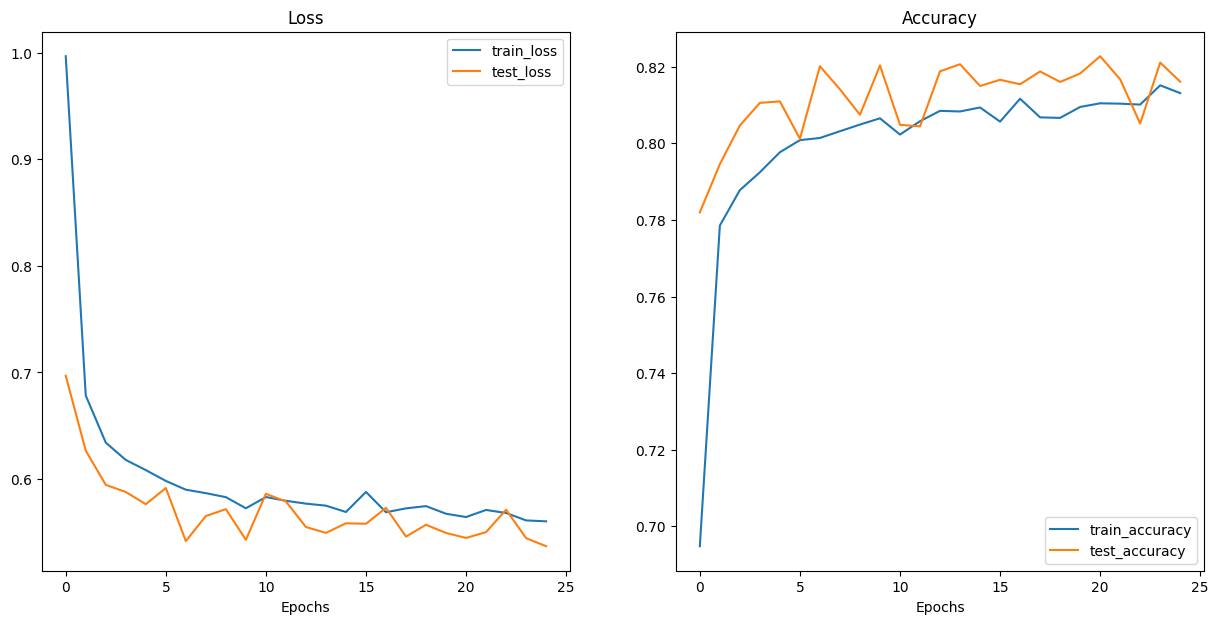

In [ ]:
plot_loss_curves(results)

In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

In [ ]:
animals_labels

['Dog',
 'Horse',
 'Elephant',
 'Butterfly',
 'Chicken',
 'Cat',
 'Cow',
 'Sheep',
 'Spider',
 'Squirrel']

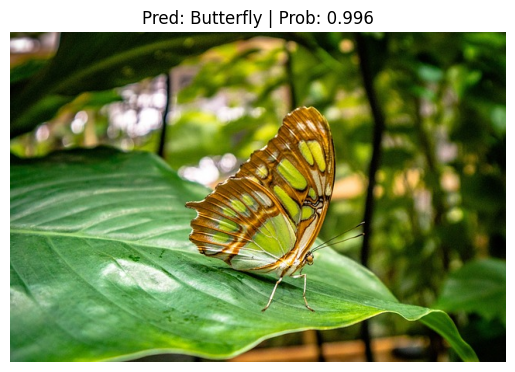

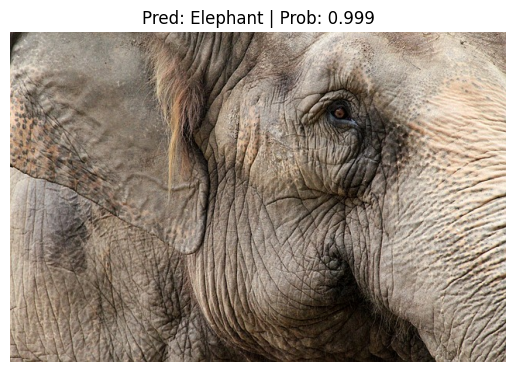

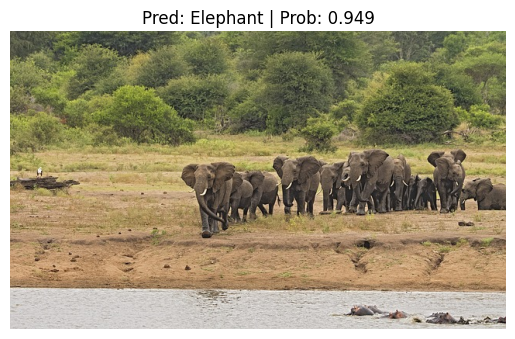

In [ ]:
import random
num_images_to_plot = 3
test_image_path_list = list(Path(path).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=res_mod,
                        image_path=image_path,
                        class_names=animals_labels,
                        transform=res_net_transforms, # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

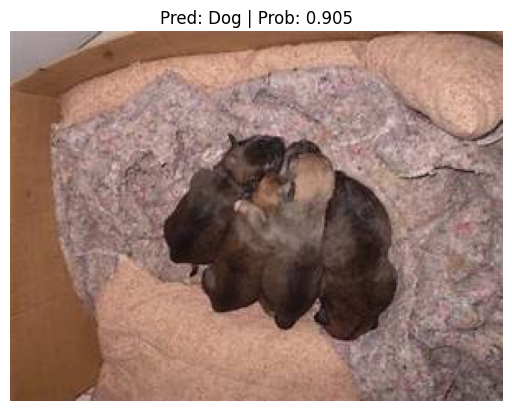

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = "/content/animals/cane/OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg"

# Predict on custom image
pred_and_plot_image(model=res_mod,
                    image_path=custom_image_path,
                    class_names=animals_labels)

In [ ]:
res_mod.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
                          3.0660e-02,  2.5398e-02],
                        [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
                          2.9754e-02,  4.1735e-02],
                        [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
                         -1.1601e-01, -1.2191e-01],
                        ...,
                        [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
                          2.4631e-03,  1.6726e-02],
                        [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
                          7.3973e-02,  5.9085e-02],
                        [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
                          8.3749e-02,  9.6970e-02]],
              
                       [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
                          2.5483

**Load our trained model**

In [ ]:
Animal_classifier = res_mod
Animal_classifier.load_state_dict(torch.load(f='/content/drive/MyDrive/deep learning/Animal_classifier.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_model_animal_classifier = Path('/content/drive/MyDrive/deep learning/Animal_classifier.pth').stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"pretrained_model_animal_classifier model size: {pretrained_model_animal_classifier} MB")

pretrained_model_animal_classifier model size: 81 MB


In [ ]:
# Count number of parameters
animal_classifier_params = sum(torch.numel(param) for param in Animal_classifier .parameters())
animal_classifier_params

21289802

In [ ]:
Animal_classifier.to("cpu")

# Check the device
next(iter(Animal_classifier.parameters())).device

device(type='cpu')

In [ ]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = res_net_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    Animal_classifier.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(Animal_classifier(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {animals_labels[i]: float(pred_probs[0][i]) for i in range(len(animals_labels))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

In [ ]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(path).glob("*/*.jpg"))  #can use jpeg or png...depending on what image types we have

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: /content/animals/elefante/eb35b70b2af0083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg

Prediction label and probability dictionary: 
{'Dog': 0.0003579432668630034, 'Horse': 0.0004469668201636523, 'Elephant': 0.9983237385749817, 'Butterfly': 7.492130680475384e-05, 'Chicken': 9.167879034066573e-05, 'Cat': 0.0002578345884103328, 'Cow': 1.864355363068171e-05, 'Sheep': 0.0003720571403391659, 'Spider': 3.420070424908772e-05, 'Squirrel': 2.2006519429851323e-05}
Prediction time: 0.31712 seconds


In [ ]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=10)]
example_list

[['/content/animals/farfalla/ea36b30a20f7003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg'],
 ['/content/animals/farfalla/ea36b00a28f1043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg'],
 ['/content/animals/elefante/eb3cb10f2cfd043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg'],
 ['/content/animals/pecora/eb3cb40e2df7063ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg'],
 ['/content/animals/elefante/eb32b50e29f3073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg'],
 ['/content/animals/ragno/ea31b90820fc1c22d2524518b7444f92e37fe5d404b0144390f8c47ba6ebb4_640.jpg'],
 ['/content/animals/farfalla/ea37b30a28f3093ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg'],
 ['/content/animals/pecora/eb30b3082bf1033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg'],
 ['/content/animals/pecora/eb36b10e2df1043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg'],
 ['/content/animals/farfalla/ea36b70e2af2003ed1584d05fb1d4e9fe777e

In [ ]:
#The gradio app will last only for 72 Hours

# Create title, description and article strings
title = "ANIMAL CLASSIFIER"
description = "A Res_Net based feature extractor computer vision model to classify images of animals."
article = "Created at Google Colab "

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=5, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False,
            share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9593848bf8bd19f228.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import shutil
from pathlib import Path

# Create Animalclassifier demo path
Animal_classifier_path = Path("Classifier/Animal_Classifier")

# Remove files that might already exist there and create new directory
if Animal_classifier_path.exists():
    shutil.rmtree(Animal_classifier_path)
    Animal_classifier_path.mkdir(parents=True,
                                    exist_ok=True)
else:
    # If the file doesn't exist, create it anyway
    Animal_classifier_path.mkdir(parents=True,
                                    exist_ok=True)

# Check what's in the folder
!ls Classifier/Animal_Classifier

In [ ]:
import shutil
from pathlib import Path

# 1. Create an examples directory
Animal_classifier_examples_path= Animal_classifier_path / "examples"
Animal_classifier_examples_path.mkdir(parents=True, exist_ok=True)

# 2. Collect three random test dataset image paths
Animals_examples = [Path('/content/animals/pecora/eb33b00f29f0003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg'),
 Path('/content/animals/ragno/ef32b70c20e90021d85a5854ee454296eb70e3c818b413449df5c379a1e8_640.jpg'),
 Path('/content/animals/gatto/eb35b60a20f71c22d2524518b7444f92e37fe5d404b0144390f8c079a1e8b6_640.jpg'),
 Path('/content/animals/gatto/kari-shea-471277-unsplash.jpg'),
 Path('/content/animals/gatto/eb33b10a2df4033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg'),
 Path('/content/animals/farfalla/ea36b30b21f0083ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg'),
 Path('/content/animals/pecora/ea37b0082af3013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg'),
 Path('/content/animals/pecora/e836b30f21f0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg'),
 Path('/content/animals/ragno/eb3cb00c2ff2003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg'),
 Path('/content/animals/gatto/ea36b20e2ef1093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg')]

# 3. Copy the three random images to the examples directory
for example in Animals_examples:
    destination = Animal_classifier_examples_path / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)

[INFO] Copying /content/animals/pecora/eb33b00f29f0003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg to Classifier/Animal_Classifier/examples/eb33b00f29f0003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
[INFO] Copying /content/animals/ragno/ef32b70c20e90021d85a5854ee454296eb70e3c818b413449df5c379a1e8_640.jpg to Classifier/Animal_Classifier/examples/ef32b70c20e90021d85a5854ee454296eb70e3c818b413449df5c379a1e8_640.jpg
[INFO] Copying /content/animals/gatto/eb35b60a20f71c22d2524518b7444f92e37fe5d404b0144390f8c079a1e8b6_640.jpg to Classifier/Animal_Classifier/examples/eb35b60a20f71c22d2524518b7444f92e37fe5d404b0144390f8c079a1e8b6_640.jpg
[INFO] Copying /content/animals/gatto/kari-shea-471277-unsplash.jpg to Classifier/Animal_Classifier/examples/kari-shea-471277-unsplash.jpg
[INFO] Copying /content/animals/gatto/eb33b10a2df4033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg to Classifier/Animal_Classifier/examples/eb33b10a2df4033ed1584d05fb1d4e9fe777ead218ac1

In [ ]:
import shutil

# Create a source path for our target model
Animal_classifier_model_path = "/content/drive/MyDrive/deep learning/Animal_classifier.pth"

# Create a destination path for our target model
Animal_classifier_model_destination = Animal_classifier_path / Animal_classifier_model_path.split("/")[-1]
print(Animal_classifier_model_destination)
# Try to move the file
try:
    print(f"[INFO] Attempting to copy {Animal_classifier_path } to {Animal_classifier_model_destination}")

    # Move the model
    shutil.copy2(src=Animal_classifier_model_path ,
                dst=Animal_classifier_model_destination)

    print(f"[INFO] Model copy complete.")

# If the model has already been moved, check if it exists
except:

    print(f"[INFO] Model exists at {Animal_classifier_model_destination}: {Animal_classifier_model_path}")

Classifier/Animal_Classifier/Animal_classifier.pth
[INFO] Attempting to copy Classifier/Animal_Classifier to Classifier/Animal_Classifier/Animal_classifier.pth
[INFO] Model copy complete.


In [ ]:
%%writefile Classifier/Animal_Classifier/model.py
import torch
import torchvision

from torch import nn


def create_res_net_model(num_classes: int=10):

    weights = models.ResNet34_Weights.DEFAULT
    transforms = weights.transforms()
    res_mod =  models.resnet34(weights=weights).

    # Freeze all layers in base model

    for param in res_mod.children():
      for param_child in param.parameters():  # Accessing children of the model
        param_child.requires_grad= False
    # Change classifier head with random seed for reproducibility


    # Recreate the classifier layer and seed it to the target device
    res_mod.fc =  torch.nn.Linear(in_features=512,
                    out_features=num_classes, # same number of output units as our number of classes
                    bias=True).to(device)

    return res_mod, transforms

Writing Classifier/Animal_Classifier/model.py


In [ ]:
%%writefile  Classifier/Animal_Classifier/app.py
### 1. Imports and class names setup ###
import gradio as gr
import os
import torch

from model import create_res_net_model
from timeit import default_timer as timer
from typing import Tuple, Dict

class_names = ['Dog','Horse','Elephant','Butterfly','Chicken','Cat','Cow','Sheep','Spider','Squirrel']

res_net_model, res_net_transforms = create_res_net_model(num_classes = len(class_names))
# Load saved weights
res_net_model.load_state_dict(
                              torch.load(f='Animal_classifier.pth',
                              map_location=torch.device('cpu')))


# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = res_net_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    res_net_model.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(res_net_model(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time


# Create title, description and article strings
title = "ANIMAL CLASSIFIER"
description = "A Res_Net based feature extractor computer vision model to classify images of animals."
article = "Created at Google Colab"

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=5, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch()

Writing Classifier/Animal_Classifier/app.py


In [ ]:
%%writefile  Classifier/Animal_Classifier/requirements.txt
torch==1.12.0
torchvision==0.13.0
gradio==3.1.4

Writing Classifier/Animal_Classifier/requirements.txt


In [ ]:
# Zip Animal Classifier folder but exclude certain files
!cd Classifier/Animal_Classifier && zip -r ../Animal_Classifier.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped Animal Classifier Big app (if running in Google Colab)
try:
    from google.colab import files
    files.download("Classifier/Animal_Classifier.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download()")

  adding: Animal_classifier.pth (deflated 7%)
  adding: app.py (deflated 57%)
  adding: examples/ (stored 0%)
  adding: examples/ea36b30b21f0083ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg (deflated 0%)
  adding: examples/eb35b60a20f71c22d2524518b7444f92e37fe5d404b0144390f8c079a1e8b6_640.jpg (deflated 0%)
  adding: examples/kari-shea-471277-unsplash.jpg (deflated 1%)
  adding: examples/ea36b20e2ef1093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg (deflated 0%)
  adding: examples/ea37b0082af3013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg (deflated 0%)
  adding: examples/eb3cb00c2ff2003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg (deflated 0%)
  adding: examples/eb33b10a2df4033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg (deflated 0%)
  adding: examples/eb33b00f29f0003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg (deflated 0%)
  adding: examples/ef32b70c20e90021d85a5854ee454296eb70e3c818b413449df5c379a1e8_640.jpg

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# IPython is a library to help work with Python iteractively
from IPython.display import IFrame

# Embed Animal classifier Gradio demo as an iFrame
IFrame(src="https://hf.space/embed/imran0511/Animal_classifier/+", width=900, height=750)